# Chapter 1 - Correlation and Autocorrelation

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import statsmodels.api as sm

### A Thin Application of Time Series

In [5]:
diet = pd.read_excel('data/diet.xlsx')
diet = pd.DataFrame(diet)

diet

,Date,diet
0,2011-06-26,70
1,2011-07-03,71
2,2011-07-10,73
3,2011-07-17,74
4,2011-07-24,72
...,...,...
256,2016-05-22,62
257,2016-05-29,62
258,2016-06-05,62
259,2016-06-12,58


In [6]:
# Convert the date index to datetime
diet = diet.set_index('Date')
diet.index = pd.to_datetime(diet.index)

diet.head()

,diet
Date,
2011-06-26,70
2011-07-03,71
2011-07-10,73
2011-07-17,74
2011-07-24,72


In [7]:
diet.tail()

,diet
Date,
2016-05-22,62
2016-05-29,62
2016-06-05,62
2016-06-12,58
2016-06-19,58


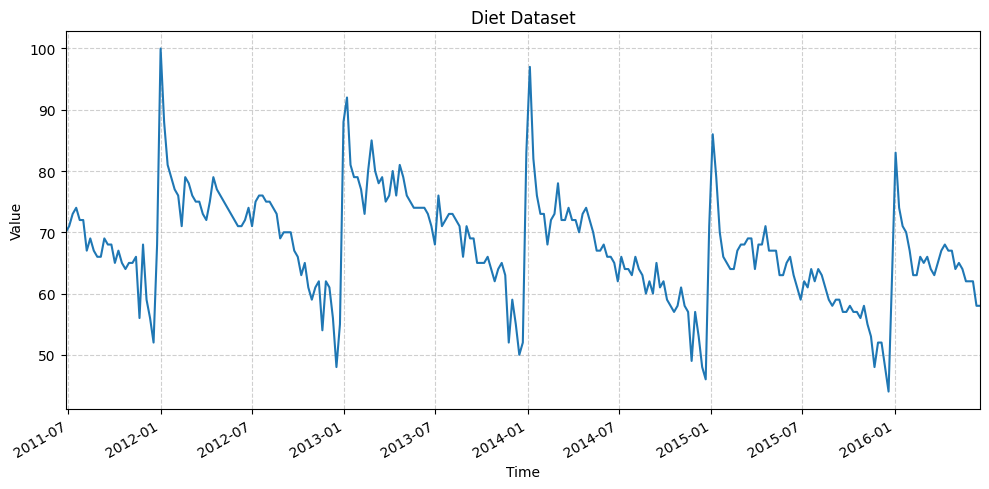

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(diet)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Diet Dataset')
ax.set_xlim(pd.to_datetime('2011-06-26'), pd.to_datetime('2016-06-19'))
ax.grid(True, linestyle='--', alpha=0.6)  

fig.autofmt_xdate()
plt.tight_layout()

In [9]:
# Ensure the index is a datetime type
diet.index = pd.to_datetime(diet.index)

# Slice the dataset to keep only 2012
diet2012 = diet.loc['2012']

diet2012.head()

,diet
Date,
2012-01-01,100
2012-01-08,88
2012-01-15,81
2012-01-22,79
2012-01-29,77


In [10]:
diet2012.tail()

,diet
Date,
2012-12-02,61
2012-12-09,56
2012-12-16,48
2012-12-23,55
2012-12-30,88


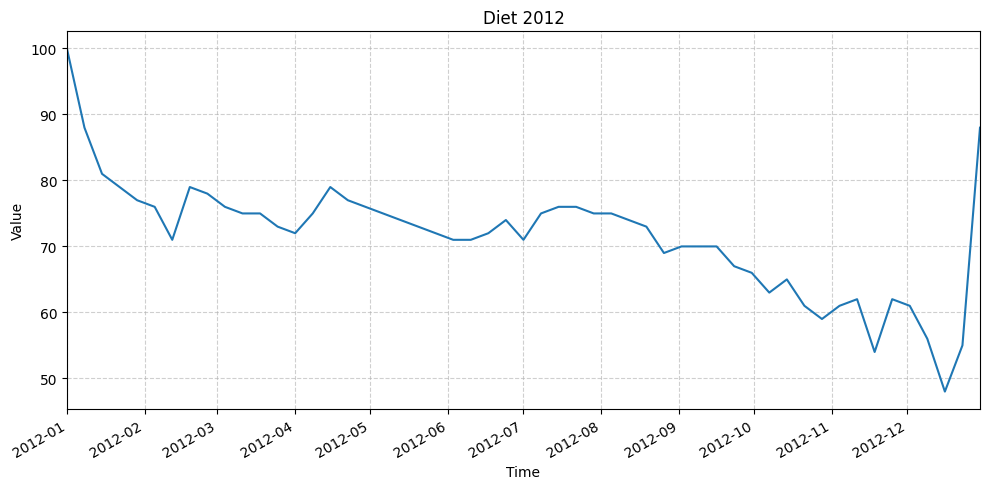

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(diet2012)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Diet 2012')
ax.set_xlim(pd.to_datetime('2012-01-01'), pd.to_datetime('2012-12-30'))
ax.grid(True, linestyle='--', alpha=0.6)  

fig.autofmt_xdate()
plt.tight_layout()

### Merging Time Series With Different Dates

Stock and bond markets in the U.S. are closed on different days. For example, 
although the bond market is closed on Columbus Day (around Oct 12) and Veterans 
Day (around Nov 11), the stock market is open on those days. One way to see the 
dates that the stock market is open and the bond market is closed is to convert 
both indexes of dates into sets and take the difference in sets.

The pandas `.join()` method is a convenient tool to merge the stock and bond 
DataFrames on dates when both markets are open.

Stock prices and 10-year US Government bond yields, which were downloaded from 
FRED, are pre-loaded in DataFrames stocks and bonds.

In [14]:
stocks = pd.read_csv('data/SP500.csv', header = 0)

stocks = stocks.set_index('observation_date')   # Set the 'observation_date' column as the index
stocks.index = pd.to_datetime(stocks.index)     # Convert the index to datetime format
stocks = stocks.rename_axis('date')             # Rename the index from 'observation_date' to 'date'

stocks

,SP500
date,
2015-03-12,2065.95
2015-03-13,2053.40
2015-03-16,2081.19
2015-03-17,2074.28
2015-03-18,2099.50
...,...
2025-03-05,5842.63
2025-03-06,5738.52
2025-03-07,5770.20


In [15]:
bonds = pd.read_csv('data/T10YFF.csv', header = 0)

bonds = bonds.set_index('observation_date')   # Set the 'observation_date' column as the index
bonds.index = pd.to_datetime(bonds.index)     # Convert the index to datetime format
bonds = bonds.rename_axis('date')             # Rename the index from 'observation_date' to 'date'

bonds['T10YFF'] = bonds['T10YFF'] * 1000

bonds

,T10YFF
date,
2015-03-10,2020.0
2015-03-11,2000.0
2015-03-12,1990.0
2015-03-13,2020.0
2015-03-16,1980.0
...,...
2025-03-04,-110.0
2025-03-05,-50.0
2025-03-06,-40.0


In [16]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how = 'inner')

{Timestamp('2025-03-11 00:00:00')}


The output {Timestamp('2025-03-11 00:00:00')} means that there is a date present in the stocks dataset that is missing from the bonds dataset. Specifically, March 11, 2025, appears in the stock market data but not in the bond market data.

This **inner join** keeps only the dates that appear in both datasets.
Since March 11, 2025, is missing in bonds, it will be excluded from the merged dataset.

In [18]:
stocks_and_bonds

,SP500,T10YFF
date,,
2015-03-12,2065.95,1990.0
2015-03-13,2053.40,2020.0
2015-03-16,2081.19,1980.0
2015-03-17,2074.28,1940.0
2015-03-18,2099.50,1820.0
...,...,...
2025-03-04,5778.15,-110.0
2025-03-05,5842.63,-50.0
2025-03-06,5738.52,-40.0


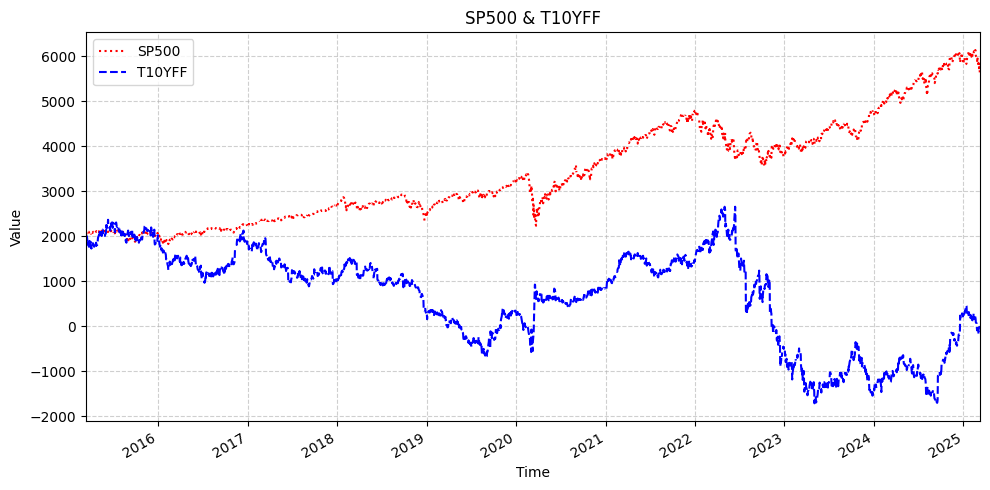

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(stocks_and_bonds['SP500'],'r:', label='SP500')
ax.plot(stocks_and_bonds['T10YFF'], 'b--', label='T10YFF')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('SP500 & T10YFF')
ax.set_xlim(pd.to_datetime('2015-03-12'), pd.to_datetime('2025-03-10'))
ax.grid(True, linestyle='--', alpha=0.6)  
ax.legend()

fig.autofmt_xdate()
plt.tight_layout()

### Correlation of Stocks and Bonds

Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, we'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

Stock prices and 10-year bond yields are combined in a DataFrame called stocks_and_bonds under columns SP500 and US10Y

In [22]:
stocks_and_bonds

,SP500,T10YFF
date,,
2015-03-12,2065.95,1990.0
2015-03-13,2053.40,2020.0
2015-03-16,2081.19,1980.0
2015-03-17,2074.28,1940.0
2015-03-18,2099.50,1820.0
...,...,...
2025-03-04,5778.15,-110.0
2025-03-05,5842.63,-50.0
2025-03-06,5738.52,-40.0


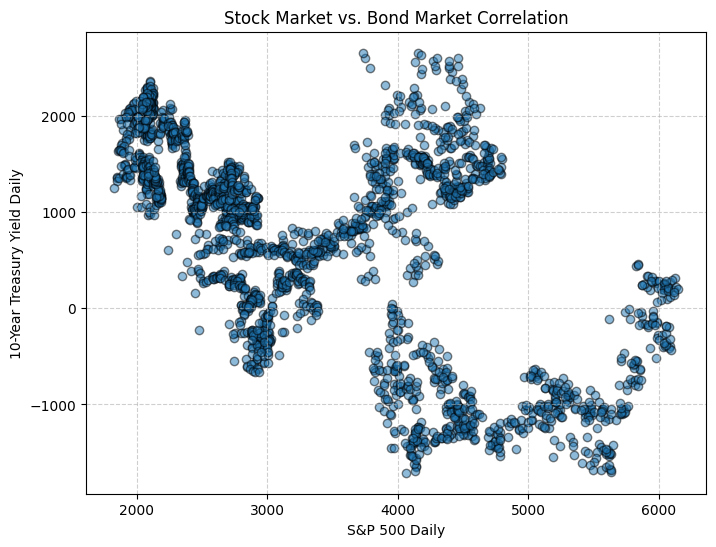

In [23]:
# Drop NaN values to avoid plotting errors
filtered_data1 = stocks_and_bonds.dropna()

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data1['SP500'], filtered_data1['T10YFF'], alpha=0.5, edgecolors='k')

# Set labels and title
plt.xlabel('S&P 500 Daily')
plt.ylabel('10-Year Treasury Yield Daily')
plt.title('Stock Market vs. Bond Market Correlation')

# Add grid and show plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [24]:
# Compute Correlation
correlation = stocks_and_bonds.corr()
print("Correlation of stocks and interest rates: ", correlation)

Correlation of stocks and interest rates:             SP500    T10YFF
SP500   1.000000 -0.575052
T10YFF -0.575052  1.000000


In [25]:
# Calculates the percentage change between consecutive rows
returns = stocks_and_bonds.pct_change(fill_method=None)
returns

,SP500,T10YFF
date,,
2015-03-12,NaN,NaN
2015-03-13,-0.006075,0.015075
2015-03-16,0.013534,-0.019802
2015-03-17,-0.003320,-0.020202
2015-03-18,0.012158,-0.061856
...,...,...
2025-03-04,-0.012235,-0.352941
2025-03-05,0.011159,-0.545455
2025-03-06,-0.017819,-0.200000


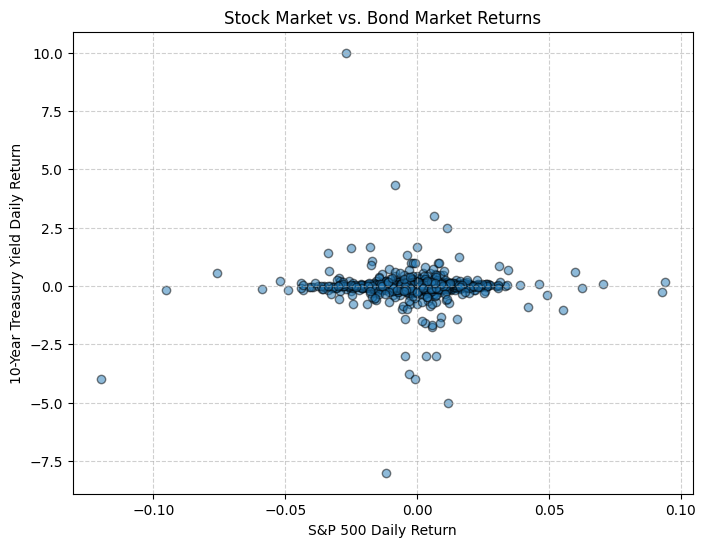

In [26]:
# Drop NaN values to avoid plotting errors
filtered_data2 = returns.dropna()

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data2['SP500'], filtered_data2['T10YFF'], alpha=0.5, edgecolors='k')

# Set labels and title
plt.xlabel('S&P 500 Daily Return')
plt.ylabel('10-Year Treasury Yield Daily Return')
plt.title('Stock Market vs. Bond Market Returns')

# Add grid and show plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [27]:
# Compute Correlation
correlation = returns.corr()
print("Correlation of stocks and interest rates: ", correlation)

Correlation of stocks and interest rates:             SP500    T10YFF
SP500   1.000000  0.019966
T10YFF  0.019966  1.000000


Two trending series may show a strong correlation even if they are completely 
unrelated. This is referred to as "spurious correlation". That's why when you 
look at the correlation of say, two stocks, you should look at the correlation 
of their returns and not their levels.

### Looking at a Regression's R-Squared

R-squared measures how closely the data fit the regression line, so the 
R-squared in a simple regression is related to the correlation between the two 
variables. In particular, the magnitude of the correlation is the square root 
of the R-squared and the sign of the correlation is the sign of the regression 
coefficient.

You will take two series, x and y, compute their correlation, and then regress 
y on x using the function OLS(y,x) in the statsmodels.api library (note that 
the dependent, or right-hand side variable y is the first argument). Most linear 
regressions contain a constant term which is the intercept (the α in the 
regression yt=α+βxt+ϵt). To include a constant using the function OLS(), you 
need to add a column of 1's to the right hand side of the regression.

In [32]:
# Set random seed
np.random.seed(42)

# Generate x from a normal distribution
x = np.random.normal(loc=0, scale=1, size=100)  

# Generate y using x with noise, ensuring correlation ~ 0.8
y = 0.8 * x + np.random.normal(loc=0, scale=0.5, size=100)

# Convert to pandas Series
x = pd.Series(x, name="x")
y = pd.Series(y, name="y")

In [33]:
# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))
print()

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

The correlation between x and y is 0.81

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           7.81e-25
Time:                        11:48:07   Log-Likelihood:                -66.393
No. Observations:                 100   AIC:                             136.8
Df Residuals:                      98   BIC:                             142.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

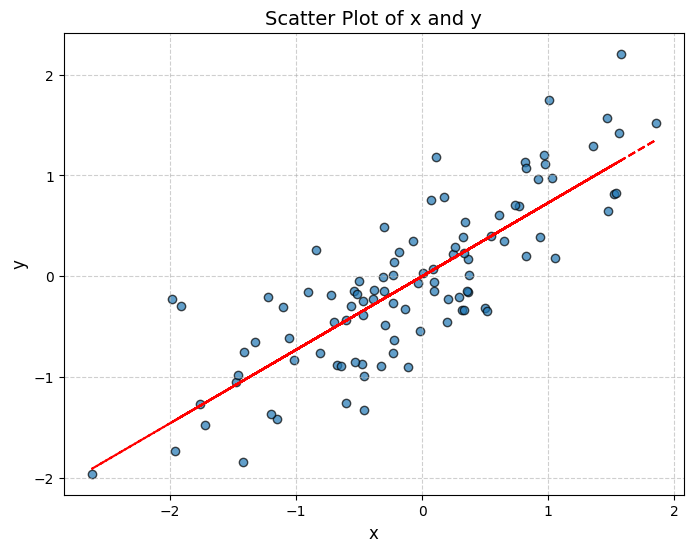

In [34]:
# Create scatter plot of x and y
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, edgecolors='k')

# Add the line with the given slope (0.7284)
y_line = 0.7284 * x 
plt.plot(x, y_line, color='red', linestyle='--', label="y = 0.7284 * x")

# Labels and title
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Scatter Plot of x and y", fontsize=14)

# Show grid
plt.grid(True, linestyle="--", alpha=0.6)

# Display plot
plt.show()

### A Popular Strategy Using Autocorrelation

One puzzling anomaly with stocks is that investors tend to overreact to news. 
Following large jumps, either up or down, stock prices tend to reverse. This 
is described as mean reversion in stock prices: prices tend to bounce back, or 
revert, towards previous levels after large moves, which are observed over time 
horizons of about a week. A more mathematical way to describe mean reversion is 
to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. If 
you're curious to learn more about this hedge fund strategy (although it's not 
necessary reading for anything else later in the course), see here.

You'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 
2017. You'll start with a DataFrame MSFT of daily prices. You should use the 
`.resample()` method to get weekly prices and then compute returns from prices. 
Use the pandas method `.autocorr()` to get the autocorrelation and show that the 
autocorrelation is negative. Note that the `.autocorr()` method only works on 
Series, not DataFrames (even DataFrames with one column), so you will have to 
select the column in the DataFrame.

In [37]:
MSFT = pd.read_excel('data/MSFT.xlsx')
MSFT = pd.DataFrame(MSFT)
MSFT

,Date,Adj Close
0,2012-08-06,26.107651
1,2012-08-07,26.377876
2,2012-08-08,26.438896
3,2012-08-09,26.587088
4,2012-08-10,26.517351
...,...,...
1253,2017-07-31,72.699997
1254,2017-08-01,72.580002
1255,2017-08-02,72.260002
1256,2017-08-03,72.150002


In [38]:
# Convert date to index
MSFT = MSFT.set_index('Date')
MSFT

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351
...,...
2017-07-31,72.699997
2017-08-01,72.580002
2017-08-02,72.260002


In [39]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule = 'W').last()

MSFT

,Adj Close
Date,
2012-08-12,26.517351
2012-08-19,27.114212
2012-08-26,26.815865
2012-09-02,27.044012
2012-09-09,27.158091
...,...
2017-07-09,69.459999
2017-07-16,72.779999
2017-07-23,73.790001


In [40]:
# Compute the percentage change of prices
returns = MSFT.pct_change()

returns.head()

,Adj Close
Date,
2012-08-12,NaN
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218


In [41]:
# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


### Are Interest Rates Autocorrelated?

The DataFrame daily_rates contains daily data of 10-year interest rates from 
1962 to 2017.

In [44]:
daily_rates = pd.read_csv('data/DGS10.csv', header = 0)

daily_rates = daily_rates.set_index('observation_date')   # Set the 'observation_date' column as the index
daily_rates.index = pd.to_datetime(daily_rates.index)     # Convert the index to datetime format
daily_rates = daily_rates.rename_axis('date')             # Rename the index from 'observation_date' to 'date'

daily_rates

,DGS10
date,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03
...,...
2016-12-26,NaN
2016-12-27,2.57
2016-12-28,2.51


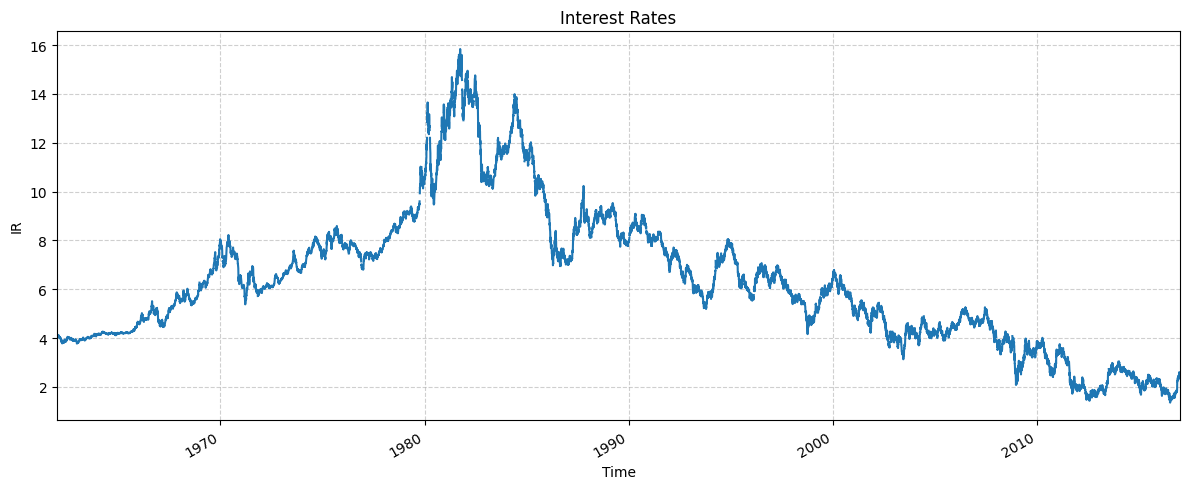

In [45]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(daily_rates)
ax.set_xlabel('Time')
ax.set_ylabel('IR')
ax.set_title('Interest Rates')
ax.set_xlim(pd.to_datetime('1962-01-02'), pd.to_datetime('2016-12-30'))
ax.grid(True, linestyle='--', alpha=0.6) 

fig.autofmt_xdate()
plt.tight_layout()

In [46]:
# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()
daily_diff.head() 

,DGS10
date,
1962-01-02,NaN
1962-01-03,-0.03
1962-01-04,-0.04
1962-01-05,0.03
1962-01-08,0.01


In [47]:
# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['DGS10'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

The autocorrelation of daily interest rate changes is 0.07


In [48]:
# Convert the daily data to annual data using the last available observation of each year
yearly_rates = daily_rates.resample(rule='YE').last()
yearly_rates.head()

,DGS10
date,
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21
1965-12-31,4.65
1966-12-31,4.64


In [49]:
# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['DGS10'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of annual interest rate changes is -0.22


When you look at daily changes in interest rates, the autocorrelation is close 
to zero. However, if you resample the data and look at annual changes, the 
autocorrelation is negative. This implies that while short term changes in 
interest rates may be uncorrelated, long term changes in interest rates are 
negatively autocorrelated. A daily move up or down in interest rates is unlikely 
to tell you anything about interest rates tomorrow, but a move in interest rates 
over a year can tell you something about where interest rates are going over 
the next year. And this makes some economic sense: over long horizons, when 
interest rates go up, the economy tends to slow down, which consequently causes 
interest rates to fall, and vice versa.